<a href="https://colab.research.google.com/github/shahjan49/CODSOFT/blob/main/CODSOFT_task_4_Sales_Predictions_by_Advertising_Costs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Necessary Libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.metrics import r2_score

Load the data and show first 10 rows of data.

In [ ]:
data=pd.read_csv("/content/advertising.csv")
data.head(10)

,sno,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,12.0
3,4,151.5,41.3,58.5,16.5
4,5,180.8,10.8,58.4,17.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,15.6


Drop Unnecessary columns from data

In [ ]:
data_new=data.drop(['sno'],axis=1)
data_new.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


Calculates statistical values and rounds them to 3 decimal places.

In [ ]:
data_new.describe().round(3)

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.264,30.554,15.131
std,85.854,14.847,21.779,5.284
min,0.700,0.000,0.300,1.600
25%,74.375,9.975,12.750,11.000
50%,149.750,22.900,25.750,16.000
75%,218.825,36.525,45.100,19.050
max,296.400,49.600,114.000,27.000


Mark null values as True and returns sum of number of True values in each column

In [ ]:
data_new.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Extracting all information about data.

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Shape of data.

In [ ]:
data_new.shape

(200, 4)

Deviding data into dependent and independent variables.

In [ ]:
x=data_new.drop(['Sales'], axis=1)
y=data_new['Sales']
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [ ]:
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


Deviding the cleaned data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

creating first Machine Learning Model 'Linear Regression'.

In [ ]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

Train the model.

In [ ]:
linear.fit(x_train,y_train)

LinearRegression()

Make predictions on model.

In [ ]:
predictions=linear.predict(x_test)
print(predictions)

[10.39192697 24.55352085 15.45371036 10.11138992 11.37764163 24.20419107
 18.48913227 14.45437801 17.14480272 18.29198295 15.16304848  9.89206852
  9.9308128  20.96721682 17.01863932 15.27152109 15.75539304 15.7539167
 24.09601121 16.95988173 21.34991127 15.19190327  9.25140237 20.03099445
 16.48900676 16.7799423   6.21384285 18.87148839 11.1609655  12.44063855
  7.89423024  9.96123432  5.8929257  23.74064647 10.60055165  8.03092597
  9.84796843  9.6226985   9.36569364 17.8851816 ]


Check accuracy score.

In [ ]:
print(r2_score(y_test, predictions))

0.8718000770602493


Import the second machine learning model 'Polynomial regression'.



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans=poly.fit_transform(x_train)
x_test_trans=poly.transform(x_test)
linear=LinearRegression()

Train the Model

In [ ]:
linear.fit(x_train_trans,y_train)

LinearRegression()

Make predictions on model

In [ ]:
y_predictions=linear.predict(x_test_trans)

Check Accuracy Score.

In [ ]:
print(r2_score(y_test,y_predictions))

0.9314403710799105


Import the third Machine Learning Model 'SVM regressor'.

In [ ]:
from sklearn.svm import SVR
svr=SVR()

Train the Model.

In [ ]:
svr.fit(x_train,y_train)

SVR()

Make predictions on Model.

In [ ]:
pred_svr=svr.predict(x_test)
print(pred_svr)

[ 9.25746652 21.21076316 16.65241133 10.62521675 12.14481673 21.19866212
 18.43703947 13.73200656 16.6424632  18.06750398 15.62455506  9.52844848
 10.73080211 20.17394417 18.00626117 15.70330798 16.69745445 16.50907103
 20.73603465 17.72859622 19.48566479 14.96223778  8.57821796 19.73544021
 15.99257991 16.50707194  7.83960602 18.73401208 12.16988321 13.93434059
  8.10441854 11.46533538  7.49613839 19.89476562 11.39817881  8.01768657
  9.48848711  9.32226031  9.94137322 17.96301502]


Check the accuracy score of model.

In [ ]:
print(r2_score(y_test, pred_svr))

0.8963929828568145


Calculating Sales for new input data.

In [ ]:
new_data={'TV':170.9,'Radio':37.6,'Newspaper':77.2}

In [ ]:
index=[1]
my_data=pd.DataFrame(new_data,index)
my_data

,TV,Radio,Newspaper
1,170.9,37.6,77.2


In [ ]:
new_predictions=linear.predict(my_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: ignored

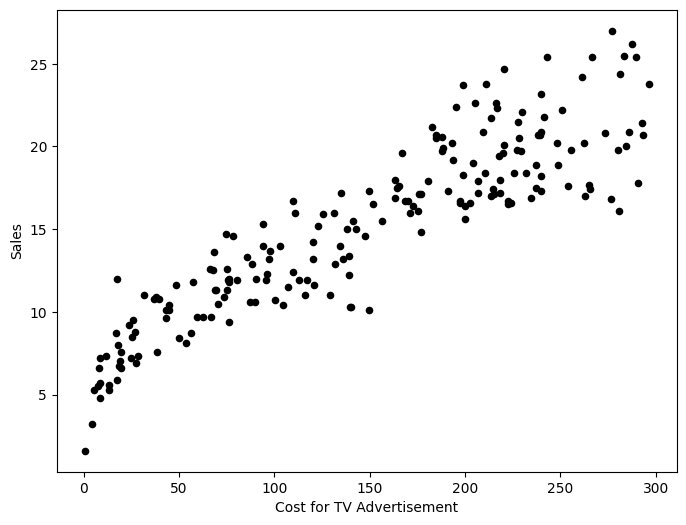

In [ ]:
ax=data.plot.scatter(x='TV', y='Sales', figsize=(8,6), color='black')
ax.set_xlabel('Cost for TV Advertisement')
plt.show()

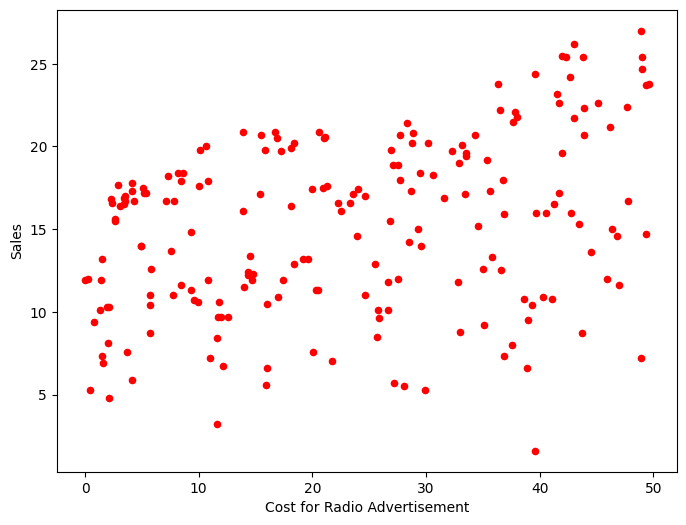

In [ ]:
ax=data.plot.scatter(x='Radio', y='Sales', figsize=(8,6), color='red')
ax.set_xlabel('Cost for Radio Advertisement')
plt.show()

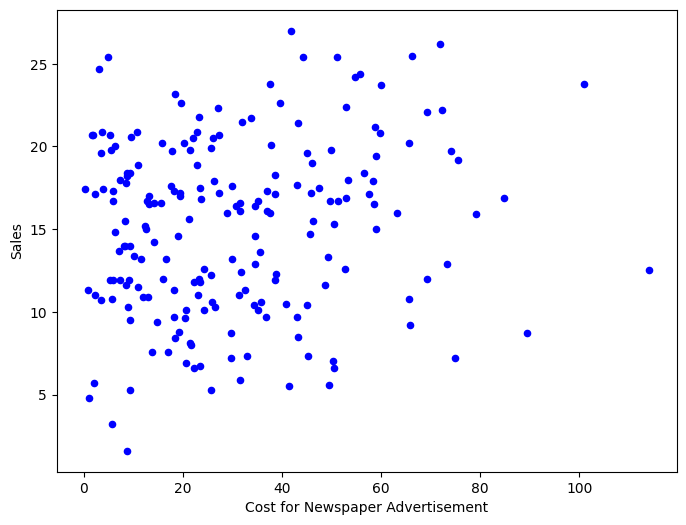

In [ ]:
ax=data.plot.scatter(x='Newspaper', y='Sales', figsize=(8,6), color='blue')
ax.set_xlabel('Cost for Newspaper Advertisement')
plt.show()